In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

[0.892222222, 0.8505555550000001, 0.951111112, 0.9361111115, 0.844999998, 0.8777777769999999, 0.8094444434999999, 0.9750000005, 0.858333333, 0.8250000009999999, 0.9288888879999999, 0.9738888905, 0.810555554, 0.8738888870000001, 0.8955555555, 0.8627777775000001, 0.8683333335, 0.8911111115000001, 0.8627777794999999, 0.8649999984999999, 0.8544444435, 0.776111113, 0.9094444465000001, 0.885555555, 0.7977777765]
[-0.1961111  -0.32972221 -0.13166666 -0.25833332 -0.41583333]
sum_axis0:  [-0.22555555 -0.36333332 -0.10444443 -0.22499999 -0.41333333]
sum_axis1:  [-0.16666666 -0.2961111  -0.15888888 -0.29166666 -0.41833332]
           Node Drop  Subgraph  Edge Pertb  Attr Mask  Identity
Node Drop  -0.036111 -0.077778    0.022778   0.007778 -0.083333
Subgraph   -0.050556 -0.118889    0.046667  -0.070000 -0.103333
Edge Pert   0.000556  0.045556   -0.117778  -0.054444 -0.032778
Attr Mask  -0.065556 -0.060000   -0.037222  -0.065556 -0.063333
Identity   -0.073889 -0.152222   -0.018889  -0.042778 -0.130

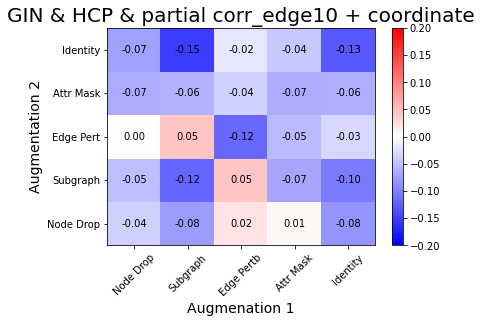

In [147]:
#gin encoder accuracy gain

##no pretrain acc
edge = 'edge10'
with open(f'../coordinate/aug3/{edge}/gin_0.1_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res','r') as file:
    x = file.readlines()
    asd = float(x[10].split()[1])
    com = float(x[12].split()[1])
    mean_no_pretrain = np.mean([asd, com])
    
# pretrain acc


gcn_mean_arr = []
gin_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"./{edge}/gin_file_list",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'./{edge}/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd = float(x[10].split()[1])
        com = float(x[12].split()[1])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        gin_mean_arr.append(mean)
print(gin_mean_arr)
gin_mean_arr =  np.array(gin_mean_arr) - np.array(mean_no_pretrain) 
#gin_mean_arr = np.array(mean_no_pretrain) - np.array(gin_mean_arr) 
gin_mean_arr_np = np.reshape(gin_mean_arr,[5,5])

#-----------------------------------------
arr_sum = []
sum_axis0 = gin_mean_arr_np.sum(axis = 0)
sum_axis1 = gin_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print(mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

print('sum_axis0: ', sum_axis0)
print('sum_axis1: ', sum_axis1)

#-----------------------------------------

gin_mean_arr = pd.DataFrame(gin_mean_arr_np, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(gin_mean_arr)

plt.pcolor(gin_mean_arr)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(gin_mean_arr.columns), 1), gin_mean_arr.columns,rotation=45)

plt.yticks(np.arange(0.5, len(gin_mean_arr.index), 1), gin_mean_arr.index)

plt.title(f'GIN & HCP & partial corr_{(edge)} + coordinate', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % gin_mean_arr_np[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
plt.clim(-0.2, 0.2)
plt.savefig(f'./gin_manual_fig_{edge}_joaoGain_aug3.png', bbox_inches = 'tight')

[0.8666666674999999, 0.8022222219999999, 0.690000001, 0.894444445, 0.861111113, 0.7483333335, 0.778888889, 0.7433333325, 0.615, 0.6577777775, 0.6583333330000001, 0.7994444449999998, 0.73333333, 0.8316666655, 0.7922222229999999, 0.904444444, 0.7277777765, 0.8049999995, 0.8250000015000001, 0.928888887, 0.8838888890000001, 0.6477777775, 0.7694444455, 0.8811111109999998, 0.881111113]
[-0.10083332 -0.53916666 -0.41083333 -0.06972221 -0.09666666]
sum_axis0:  [-0.12722221 -0.43277777 -0.44777777 -0.14166666 -0.06777777]
sum_axis1:  [-0.07444443 -0.64555555 -0.37388888  0.00222223 -0.12555554]
           Node Drop  Subgraph  Edge Pertb  Attr Mask  Identity
Node Drop   0.028889 -0.035556   -0.147778   0.056667  0.023333
Subgraph   -0.089444 -0.058889   -0.094444  -0.222778 -0.180000
Edge Pert  -0.179444 -0.038333   -0.104444  -0.006111 -0.045556
Attr Mask   0.066667 -0.110000   -0.032778  -0.012778  0.091111
Identity    0.046111 -0.190000   -0.068333   0.043333  0.043333


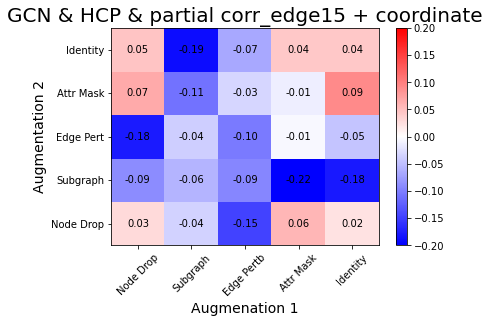

In [151]:
#gcn encoder accuracy gain

##no pretrain acc
edge = 'edge15'
encoder = 'gcn'
with open(f'../coordinate/aug3/{edge}/gcn_1.0_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res','r') as file:
    x = file.readlines()
    asd = float(x[10].split()[1])
    com = float(x[12].split()[1])
    mean_no_pretrain = np.mean([asd, com])

##pretrain acc
gcn_mean_arr=[]
gin_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"./{edge}/{encoder}_file_list",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'./{edge}/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd = float(x[10].split()[1])
        com = float(x[12].split()[1])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        gcn_mean_arr.append(mean)
print(gcn_mean_arr)
gcn_mean_arr = np.array(gcn_mean_arr) - np.array(mean_no_pretrain)
#gcn_mean_arr = np.array(mean_no_pretrain) - np.array(gcn_mean_arr)
gcn_mean_arr_np = np.reshape(gcn_mean_arr,[5,5])


#-----------------------------------------
arr_sum = []
sum_axis0 = gcn_mean_arr_np.sum(axis = 0)
sum_axis1 = gcn_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print(mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

print('sum_axis0: ', sum_axis0)
print('sum_axis1: ', sum_axis1)

#-----------------------------------------

gcn_mean_arr = pd.DataFrame(gcn_mean_arr_np, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(gcn_mean_arr)

plt.pcolor(gcn_mean_arr)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(gcn_mean_arr.columns), 1), gcn_mean_arr.columns,rotation=45)

plt.yticks(np.arange(0.5, len(gcn_mean_arr.index), 1), gcn_mean_arr.index)

plt.title(f'GCN & HCP & partial corr_{(edge)} + coordinate', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % gcn_mean_arr_np[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
plt.clim(-0.2, 0.2)
plt.savefig(f'./gcn_manual_fig_{edge}_joaoGain_aug3.png', bbox_inches = 'tight')

[0.6511111119999999, 0.7705555555, 0.64611111, 0.6522222225000001, 0.6699999985, 0.717222222, 0.7294444435, 0.587777779, 0.467777777, 0.743333333, 0.48944444499999995, 0.5749999995, 0.657777778, 0.5700000004999999, 0.6594444445000001, 0.5838888885, 0.703888888, 0.5766666669999999, 0.6172222215, 0.608333332, 0.6511111105, 0.7950000005, 0.7199999989999999, 0.6616666665, 0.7694444445]
[-0.25027778 -0.08194444 -0.42166666 -0.46222222  0.03222222]
sum_axis0:  [-0.39888889  0.08222222 -0.30333333 -0.52277778 -0.04111111]
sum_axis1:  [-0.10166667 -0.24611111 -0.54       -0.40166667  0.10555556]
           Node Drop  Subgraph  Edge Pertb  Attr Mask  Identity
Node Drop  -0.047222  0.072222   -0.052222  -0.046111 -0.028333
Subgraph    0.018889  0.031111   -0.110556  -0.230556  0.045000
Edge Pert  -0.208889 -0.123333   -0.040556  -0.128333 -0.038889
Attr Mask  -0.114444  0.005556   -0.121667  -0.081111 -0.090000
Identity   -0.047222  0.096667    0.021667  -0.036667  0.071111


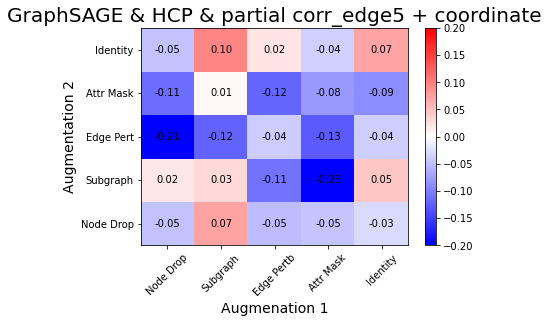

In [154]:
#graphsage encoder accuracy gain

##no pretrain acc
edge = 'edge5'
with open(f'../coordinate/aug3/{edge}/graphsage_1.0_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res','r') as file:
    x = file.readlines()
    asd = float(x[10].split()[1])
    com = float(x[12].split()[1])
    mean_no_pretrain = np.mean([asd, com])
    
##pretrain acc

gcn_mean_arr = []
gin_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"./{edge}/graphsage_file_list",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'./{edge}/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd = float(x[10].split()[1])
        com = float(x[12].split()[1])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        gcn_mean_arr.append(mean)
print(gcn_mean_arr)
gcn_mean_arr = np.array(gcn_mean_arr) - np.array(mean_no_pretrain)
#gcn_mean_arr = np.array(mean_no_pretrain) - np.array(gcn_mean_arr) 
gcn_mean_arr_np = np.reshape(gcn_mean_arr,[5,5])

#-----------------------------------------
arr_sum = []
sum_axis0 = gcn_mean_arr_np.sum(axis = 0)
sum_axis1 = gcn_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print(mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

print('sum_axis0: ', sum_axis0)
print('sum_axis1: ', sum_axis1)

#-----------------------------------------

gcn_mean_arr = pd.DataFrame(gcn_mean_arr_np, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(gcn_mean_arr)

plt.pcolor(gcn_mean_arr)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(gcn_mean_arr.columns), 1), gcn_mean_arr.columns,rotation=45)

plt.yticks(np.arange(0.5, len(gcn_mean_arr.index), 1), gcn_mean_arr.index)

plt.title(f'GraphSAGE & HCP & partial corr_{(edge)} + coordinate', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % gcn_mean_arr_np[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
plt.clim(-0.2, 0.2)
plt.savefig(f'./graphsage_manual_fig_{edge}_joaoGain_aug3.png', bbox_inches = 'tight')

TypeError: object of type 'numpy.float64' has no len()

In [133]:
mean_arr = []
sd_arr = []

res_file= open('../coordinate/aug3/res_file', 'r')
res_file_list = [i for i in res_file.read().split()]
res_file_list_np = np.array(res_file_list)
res_file_list_np = np.reshape(res_file_list_np, (1,36))

for i in range(len(res_file_list)):
    with open(f'../coordinate/aug3/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd_mean = float(x[10].split()[1])
        com_mean = float(x[12].split()[1])
        asd_sd = float(x[11].split()[1])
        com_sd = float(x[13].split()[1])
        mean = np.mean([asd_mean, com_mean])
        sd = np.mean([asd_sd, com_sd])
        #print(asd, com, mean)
        mean_arr.append(mean)
        sd_arr.append(sd)
#print(mean_arr)
#print(sd_arr)
mean_arr = np.reshape(np.array(mean_arr), (1,36))
sd_arr = np.reshape(np.array(sd_arr), (1,36))
total = np.concatenate((res_file_list_np, mean_arr), axis=0)
total = np.concatenate((total, sd_arr), axis=0)
print(total.shape)
np.savetxt('./result.csv',total,delimiter=",", fmt="%s")

(3, 36)
